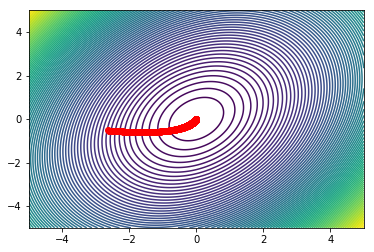

Minimum:  1.778867308999148e-05
Number of Iterations:   1001
[-2.64061328 -0.52490307]
[-0.003876   -0.00719315]


In [13]:
# Houman Alizadeh
# Homewrok Lecture 16
# Finding the minimum of the given function in 2 ways:
# way 1 :
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

def derivative(f, xy, d = 0.01):
    
    x , y = xy[0], xy[1]
    f_x = (f([x+d/2,y]) - f([x-d/2,y]))/d
    f_y = (f([x,y+d/2]) - f([x,y-d/2]))/d
    
    return np.array([f_x,f_y])

def init(x_min, x_max, y_min, y_max):
    x_0 = x_min + np.random.random() * (x_max-x_min)
    y_0 = y_min + np.random.random() * (y_max-y_min)
    return [x_0, y_0]

xmin= -5 
xmax= 5
ymin= -5
ymax= 5

n_x = np.linspace(xmin,xmax,200)
n_y = np.linspace(ymin,ymax,200)

x,y = np.meshgrid(n_x,n_y)

def Minimizer(f,x_0, N=1000):
    x_now = x_0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    d_x = 0.01

    for i in range(N):
        
        df_now = derivative(f, x_now) 
        x_next = x_now - df_now * d_x
       
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

[x_0, y_0] = init(xmin, xmax, ymin, ymax)
converged, x_hist, fmin = minimize_fix(f, [x_0,y_0])
x,y = np.meshgrid(n_x,n_y)
z = f([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('Minimum: ', fmin) 
print('Number of Iterations:  ', len(x_hist))
print(x_hist[0])
print(x_hist[-1])

In [23]:
# way 2: from Scipy we can do the same thing way quicker
from scipy.optimize import minimize
# I used different methods to see the difference between them!
[x_0, y_0] = init(xmin, xmax, ymin, ymax)
Minimum = minimize(f, [x_0, y_0], method='CG', tol=1e-4, options={'disp': True}) 
Minimum = minimize(f, [x_0, y_0], method='Powell', tol=1e-4, options={'disp': True})
Minimum = minimize(f, [x_0, y_0], method='BFGS', tol=1e-4, options={'disp': True})
Minimum = minimize(f, [x_0, y_0], method='TNC', tol=1e-4, options={'disp': True})
#help(minimize)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 44
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 6
